# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 49 min

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=07099444-1a4d-41b9-8cf5-df8deca33c7a
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 46.9MB/s]


In [3]:
from _morph import *
help(mm.infrec)

Help on function infrec in module _morph:

infrec(f, g, b=array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8))
    This function will be dilate g with minimum f, until converge
    input: 
      - f: input image
      - g: mark image
      - b: neighbors
    output:
      - y: result of inf-reconstruction



# mminfrec 

Inf-reconstruction.

### Equação:

$$(f \oplus_{g} b)^\infty = \underbrace{((((f \wedge g)\oplus_g b ) \oplus_g b ) \cdots \oplus_g b )}_{\infty} $$

$$f \oplus_{g} b = (f \oplus b)\wedge g$$

```
function y=mminfrec_equ( f, g, bc )
  n = length(f);
  y = mmcdil(f,g,bc,n); 
```

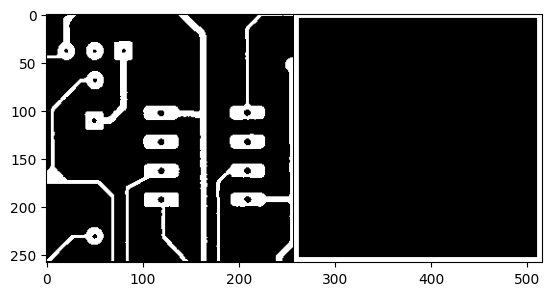

In [4]:
img = mm.read('https://drive.google.com/file/d/1PJxFIpvmKo5IlGxtO3WPdD49dcSTMsNY/view?usp=sharing')
g = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
ret, g = cv2.threshold(g, 125, 255, cv2.THRESH_BINARY)
f = np.ones_like(g)*255
borda = 5
f[borda:-borda,borda:-borda] = 0
mm.show(cv2.hconcat((g, f)))  

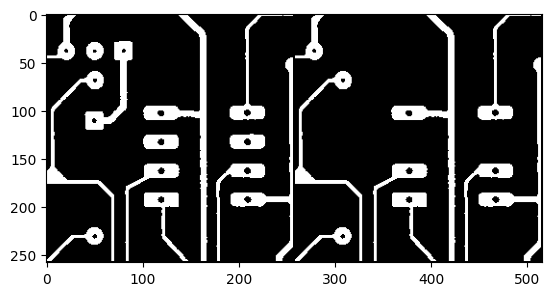

In [5]:
b = np.ones((3,3),np.uint8)
r = mm.infrec(f,g,b) 
mm.show(cv2.hconcat((g, r))) 

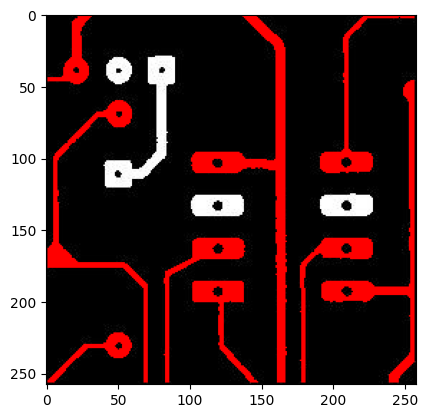

In [6]:
mm.show(img,r) 